<a href="https://colab.research.google.com/github/Ananya-AJ/CMPE255-SafeDose/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read tsv

drug = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DAWN-2011-DS0001-data-excel.tsv', sep = '\t', header = 0)

In [ ]:
drug.head()

,CASEID,METRO,STRATA,PSU,REPLICATE,CASEWGT,PSUFRAME,AGECAT,SEX,RACE,...,sdled_4_22,sdled_5_22,sdled_6_22,CASETYPE,DISPOSITION,ALCOHOL,NONALCILL,PHARMA,NONMEDPHARMA,ALLABUSE
0,1,2,25,108,2,0.942635,3,4,1,2,...,-7.0,-7.0,-7,8,6,1,1,0,0,1
1,2,2,29,129,2,5.992011,9,11,1,3,...,-7.0,-7.0,-7,4,7,0,0,1,0,0
2,3,7,7,25,1,4.723172,6,11,2,2,...,-7.0,-7.0,-7,4,1,0,0,1,0,0
3,4,10,8,29,2,4.080147,6,2,1,3,...,-7.0,-7.0,-7,4,7,0,0,1,0,0
4,5,1,22,94,2,5.177709,10,6,1,3,...,-7.0,-7.0,-7,8,8,1,1,0,0,1


In [ ]:
drug.isna().sum()

##Visualize the genders that are most impacted/ abused

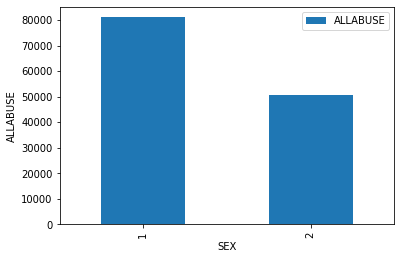

In [ ]:
gender_abuse = drug[['SEX','ALLABUSE']]
gender_abuse = gender_abuse.loc[(gender_abuse['SEX']!=-8) & (gender_abuse['ALLABUSE'] == 1)]

gender_abuse.groupby('SEX').count().plot.bar()
plt.xlabel('SEX')
plt.ylabel('ALLABUSE')
plt.show()

##Age categories where the abuse is higher

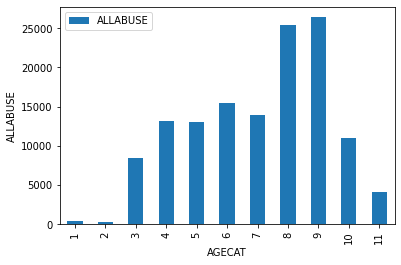

In [ ]:
agewise_abuse = drug[['AGECAT','ALLABUSE']]
agewise_abuse = agewise_abuse.loc[(agewise_abuse['AGECAT']!=-8) & (agewise_abuse['ALLABUSE'] == 1)]
agewise_abuse.groupby('AGECAT').count()

agewise_abuse.groupby('AGECAT').count().plot.bar()
plt.xlabel('AGECAT')
plt.ylabel('ALLABUSE')
plt.show()

##Visualize if abuses relate to the races

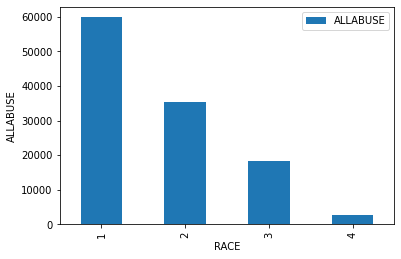

In [ ]:
racewise_abuse = drug[['RACE','ALLABUSE']]
racewise_abuse = racewise_abuse.loc[(racewise_abuse['RACE']!=-8) & (racewise_abuse['ALLABUSE'] == 1)]

racewise_abuse.groupby('RACE').count().plot.bar()
plt.xlabel('RACE')
plt.ylabel('ALLABUSE')
plt.show()

## Total cases in each metro and individual case type count in that metro

In [ ]:
df_grouped = drug.groupby(['METRO', 'CASETYPE']).agg(
    count_col=pd.NamedAgg(column='CASETYPE', aggfunc="count")
)
df_grouped["USA_2011"] = "USA_2011"
df_grouped = df_grouped.reset_index()

fig = px.sunburst(df_grouped,
                  path=["USA_2011", "METRO", "CASETYPE"],
                  values='count_col',
                  title="CASETYPE distribution(counts of cases with this casetype) in each metro",
                  width=750, height=750)
fig.show()

##drug/drugs are predominant in each type of case (suicide, overmedication, etc)

In [ ]:
casetype_drug_df = drug[['CASETYPE','DRUGID_1','DRUGID_2','DRUGID_3']]
casetype_drug_df.sort_index(axis=1,inplace=True)
casetype_drug_df.head()

##For each casetype, drugid's most occuring drugs for that case with counts

In [ ]:
group_casetypes_df = drug.groupby('CASETYPE').aggregate(
            ({'DRUGID_1':['max','count'],'DRUGID_2':['max','count'],'DRUGID_3':['max','count']})
)

group_casetypes_df

##casetypes majority for each gender

In [ ]:
df_grouped_gender = drug.groupby(['SEX', 'CASETYPE']).agg(
    count_col=pd.NamedAgg(column='CASETYPE', aggfunc="count")
)
df_grouped_gender= df_grouped_gender.reset_index()
fig = px.sunburst(df_grouped_gender,
                  path=["SEX", "CASETYPE"],
                  values='count_col',
                  title="CASETYPE distribution(counts of cases with this casetype) in each gender",
                  width=750, height=750)
fig.show()

##Race - casetypes (to see if there is any pattern between the casetypes and race)

In [ ]:

df_grouped_race = drug.groupby(['RACE', 'CASETYPE']).agg(
    count_col=pd.NamedAgg(column='CASETYPE', aggfunc="count")
)
df_grouped_race= df_grouped_race.reset_index()

fig = px.sunburst(df_grouped_race,
                  path=["RACE", "CASETYPE"],
                  values='count_col',
                  title="CASETYPE distribution(counts of cases with this casetype) in each race",
                  width=750, height=750)
fig.show()